# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
!pip install citipy
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
import api_keys as api_keys
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
import os


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 644


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
 # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial"

# # Define an empty list to fetch the weather data for each city
city_data = []

#  # Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#  # Create counters
record_count = 1
set_count = 1

# # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
#      # Group cities in sets of 50 for logging purposes
     if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

     # Create endpoint URL with each city 
for city in cities:     
    city_url = url + "&appid=" + weather_api_key + "&q=" + str(city)

 #   Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

  # Run an API request for each of the cities           
    try:    
    # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']                       
        timestamp = city_weather["dt"]                     
        city_date = pd.to_datetime(timestamp, unit='s').strftime('%m/%d/%Y')

          # Append the City information into city_data list
        city_data.append({"City": city, 
                     "Lat": city_lat, 
                     "Lng": city_lng, 
                     "Max Temp": city_max_temp,
                     "Humidity": city_humidity,
                     "Cloudiness": city_clouds,
                     "Wind Speed": city_wind,
                     "Country": city_country,
                     "Date": city_date})
    
#     # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
    pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        




Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 13 | hermanus
Processing Record 1 of Set 13 | barrow
Processing Record 2 of Set 13 | qaanaaq
Processing Record 3 of Set 13 | farah
Processing Record 4 of Set 13 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 13 | upernavik
Processing Record 6 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 13 | ushuaia
Processing Record 8 of Set 13 | hilo
Processing Record 9 of Set 13 | tukrah
Processing Record 10 of Set 13 | dudinka
Processing Record 11 of Set 13 | ambon
Processing Record 12 of Set 13 | rikitea
Processing Record 13 of Set 13 | kapaa
Processing Record 14 of Set 13 | praia
Processing Record 15 of Set 13 | albany
Processing Record 16 of Set 13 | college
Processing Record 17 of Set 13 | jamestown
Processing Record 18 of Set 13 | ourossogui
Processing Record 19 of Set 13 | busselton
Processing Record 20 of Set 13 | hirara
Processing Record 21 of Set

Processing Record 180 of Set 13 | galiwinku
City not found. Skipping...
Processing Record 181 of Set 13 | wahiawa
Processing Record 182 of Set 13 | vila velha
Processing Record 183 of Set 13 | guapore
Processing Record 184 of Set 13 | bargal
City not found. Skipping...
Processing Record 185 of Set 13 | sao joao da barra
Processing Record 186 of Set 13 | khonuu
City not found. Skipping...
Processing Record 187 of Set 13 | alofi
Processing Record 188 of Set 13 | yerani
City not found. Skipping...
Processing Record 189 of Set 13 | artyk
City not found. Skipping...
Processing Record 190 of Set 13 | hamilton
Processing Record 191 of Set 13 | wadowice
Processing Record 192 of Set 13 | broceni
Processing Record 193 of Set 13 | nelson bay
Processing Record 194 of Set 13 | burnie
Processing Record 195 of Set 13 | codrington
Processing Record 196 of Set 13 | namatanai
Processing Record 197 of Set 13 | kondinskoye
Processing Record 198 of Set 13 | williams lake
Processing Record 199 of Set 13 | m

Processing Record 356 of Set 13 | antsohihy
Processing Record 357 of Set 13 | samalaeulu
City not found. Skipping...
Processing Record 358 of Set 13 | mataro
Processing Record 359 of Set 13 | saint-paul
Processing Record 360 of Set 13 | xuddur
Processing Record 361 of Set 13 | caraballeda
Processing Record 362 of Set 13 | lepaterique
Processing Record 363 of Set 13 | gasa
Processing Record 364 of Set 13 | yatou
Processing Record 365 of Set 13 | dunedin
Processing Record 366 of Set 13 | lolua
City not found. Skipping...
Processing Record 367 of Set 13 | ilhabela
Processing Record 368 of Set 13 | saint-leu
Processing Record 369 of Set 13 | sinnar
Processing Record 370 of Set 13 | scarborough
Processing Record 371 of Set 13 | talaya
Processing Record 372 of Set 13 | cururupu
Processing Record 373 of Set 13 | hasaki
Processing Record 374 of Set 13 | kaniama
Processing Record 375 of Set 13 | grande-riviere
City not found. Skipping...
Processing Record 376 of Set 13 | sayyan
Processing Recor

Processing Record 536 of Set 13 | graham
Processing Record 537 of Set 13 | poum
Processing Record 538 of Set 13 | araouane
Processing Record 539 of Set 13 | dongzhen
Processing Record 540 of Set 13 | marawi
Processing Record 541 of Set 13 | lata
Processing Record 542 of Set 13 | chicama
Processing Record 543 of Set 13 | viligili
City not found. Skipping...
Processing Record 544 of Set 13 | yambio
Processing Record 545 of Set 13 | caninde
Processing Record 546 of Set 13 | mugumu
Processing Record 547 of Set 13 | juba
Processing Record 548 of Set 13 | kuche
City not found. Skipping...
Processing Record 549 of Set 13 | presidencia roque saenz pena
Processing Record 550 of Set 13 | rio grande city
Processing Record 551 of Set 13 | kurilsk
Processing Record 552 of Set 13 | vestmannaeyjar
Processing Record 553 of Set 13 | shaoxing
Processing Record 554 of Set 13 | waipawa
Processing Record 555 of Set 13 | maceio
Processing Record 556 of Set 13 | kazerun
Processing Record 557 of Set 13 | kang

In [7]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,67.80,76,49,10.56,ZA,04/03/2023
1,barrow,71.2906,-156.7887,3.22,85,100,14.97,US,04/03/2023
2,qaanaaq,77.4840,-69.3632,-7.96,72,0,3.22,GL,04/03/2023
3,farah,32.5000,62.5000,63.68,17,0,7.61,AF,04/03/2023
4,upernavik,72.7868,-56.1549,-11.20,92,77,2.71,GL,04/03/2023


In [9]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")




In [10]:
# Read saved data

city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,67.80,76,49,10.56,ZA,04/03/2023
1,barrow,71.2906,-156.7887,3.22,85,100,14.97,US,04/03/2023
2,qaanaaq,77.4840,-69.3632,-7.96,72,0,3.22,GL,04/03/2023
3,farah,32.5000,62.5000,63.68,17,0,7.61,AF,04/03/2023
4,upernavik,72.7868,-56.1549,-11.20,92,77,2.71,GL,04/03/2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

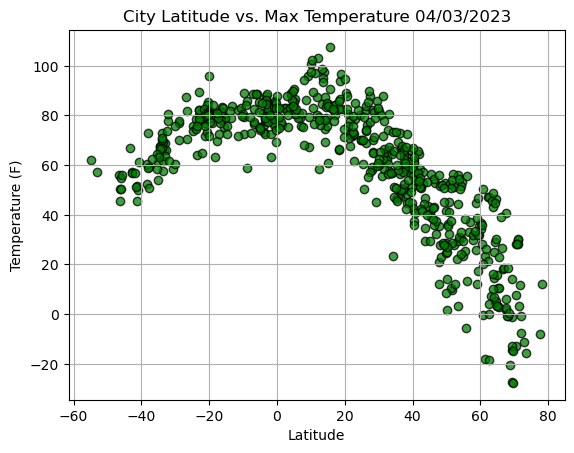

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o",facecolors="green", edgecolors="black", alpha=0.75 )

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

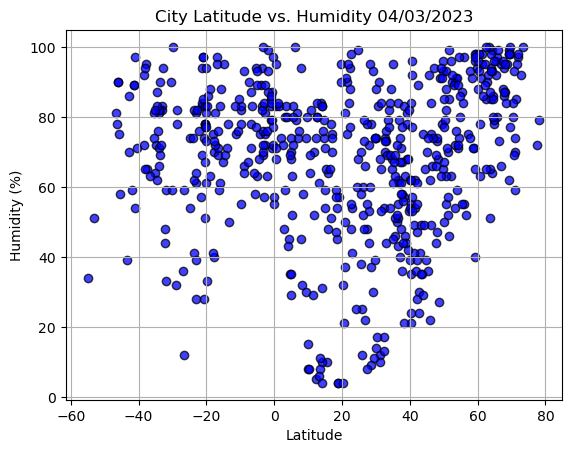

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o",facecolors="blue", edgecolors="black", alpha=0.75 )

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

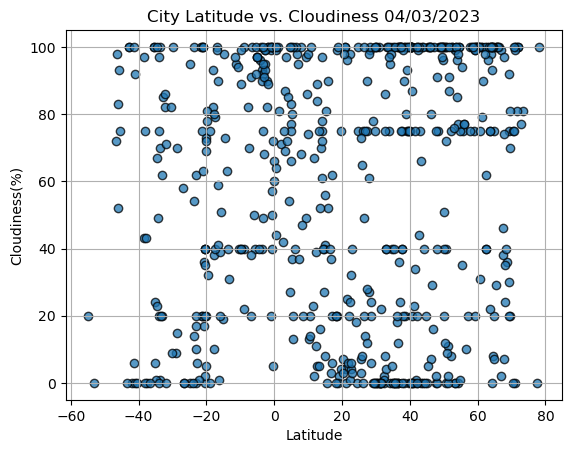

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

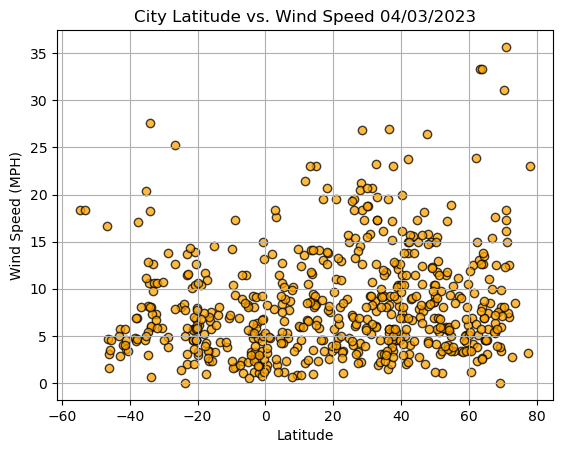

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="orange", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def Linregression(df, x_column_name, y_column_name, hemi, color, marker, xytext1, xytext2):
    x_axis = df[x_column_name]
    y_axis = df[y_column_name]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    # y = mx + b
    regress_values = x_axis * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(line_equation)

    XY_Plot = plt.scatter(x_axis, y_axis, marker=marker, facecolors=color, edgecolors="black", alpha=0.75 )
    plt.plot(x_axis,regress_values, color='r', alpha=0.5)
    # Set X and Y label, title
    plt.title(f'City {y_column_name} vs. {x_column_name} in {hemi} Hemisphere {time.strftime("%m/%d/%Y")}')
    plt.xlabel(x_column_name)
    plt.ylabel(y_column_name)
    

    # Calculate r-squared
    r_squared = round(rvalue**2,2)
    print(f"The r-squared is: {r_squared}")


    # Add line Annotation and r-squared to the graph 
    plt.annotate(line_equation,xytext1, fontsize=11, color="red")
    plt.annotate(f'r-squared = {r_squared}', xytext2, fontsize=11, color="red")
    plt.show()
    plt.close()




In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_s = city_data_df["Lat"] >= 0
northern_hemi_df = city_data_df.loc[northern_hemi_s]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,barrow,71.2906,-156.7887,3.22,85,100,14.97,US,04/03/2023
2,qaanaaq,77.4840,-69.3632,-7.96,72,0,3.22,GL,04/03/2023
3,farah,32.5000,62.5000,63.68,17,0,7.61,AF,04/03/2023
4,upernavik,72.7868,-56.1549,-11.20,92,77,2.71,GL,04/03/2023
6,hilo,19.7297,-155.0900,71.28,95,75,3.44,US,04/03/2023


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[~northern_hemi_s]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,67.80,76,49,10.56,ZA,04/03/2023
5,ushuaia,-54.8000,-68.3000,62.26,34,20,18.41,AR,04/03/2023
9,ambon,-3.6954,128.1814,73.54,94,40,9.22,ID,04/03/2023
10,rikitea,-23.1203,-134.9692,80.19,81,62,13.71,PF,04/03/2023
17,busselton,-33.6500,115.3333,57.79,90,1,8.08,AU,04/03/2023


###  Temperature vs. Latitude Linear Regression Plot

y = -1.24x + 99.81
The r-squared is: 0.77


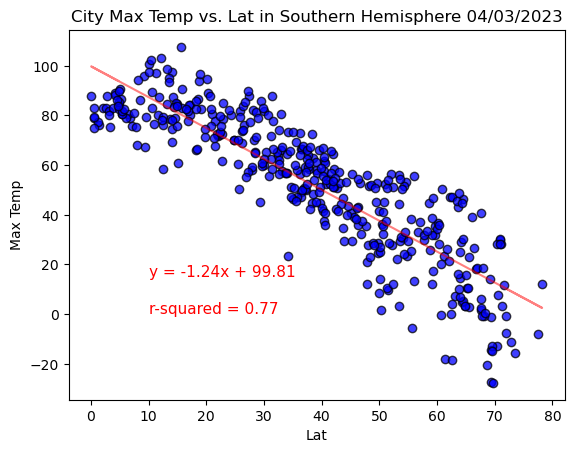

In [43]:
# Linear regression on Northern Hemisphere

Linregression(northern_hemi_df,"Lat", "Max Temp", "Southern", "b", "o", (10,15), (10,0))



y = 0.54x + 84.91
The r-squared is: 0.52


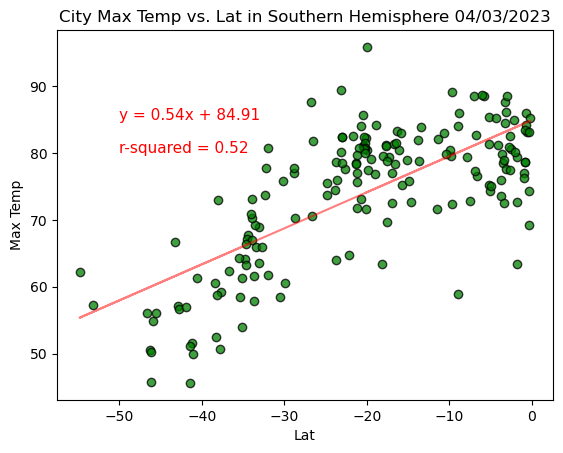

In [44]:
# Linear regression on Southern Hemisphere

Linregression(southern_hemi_df, "Lat", "Max Temp", "Southern", "g", "o",(-50,85), (-50,80))



**Discussion about the linear relationship:** Maximum temperature shows a strong linear decreaing trend with increasing latitude. Meaning, as one moves away from the equator, maximum temperature decreases linerarly.  Linearity is further confirmed via r-squared value of 0.77 for a linear fit.  Similar linear trend is also seem for the cities in the southern hemisphere where again a move towards the equator shows an increase in maximum temperature.  However, there is more scatter in the data leading to not as strong of a linear fit (r-squared value of 0.27) as seen for the cities in the northern hemisphere.   This weaker fit may be due to the number of data points available for the southern hemisphere.  It appears that there are significantly less number of data points for the southern hemisphere.  

### Humidity vs. Latitude Linear Regression Plot

y = 0.46x + 48.99
The r-squared is: 0.15


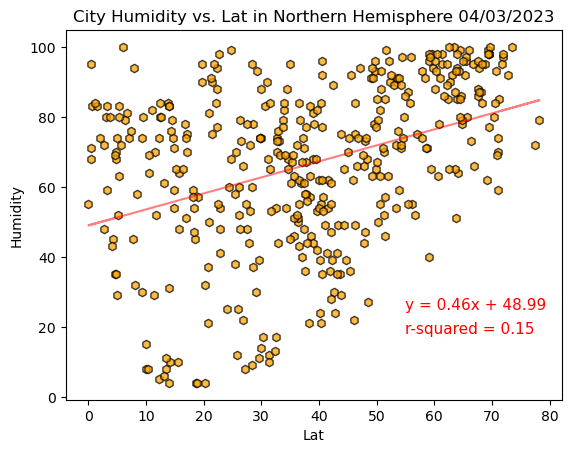

In [45]:
# Northern Hemisphere
Linregression(northern_hemi_df,"Lat", "Humidity", "Northern", "orange", "h", (55,25), (55,18))

y = 0.21x + 77.9
The r-squared is: 0.03


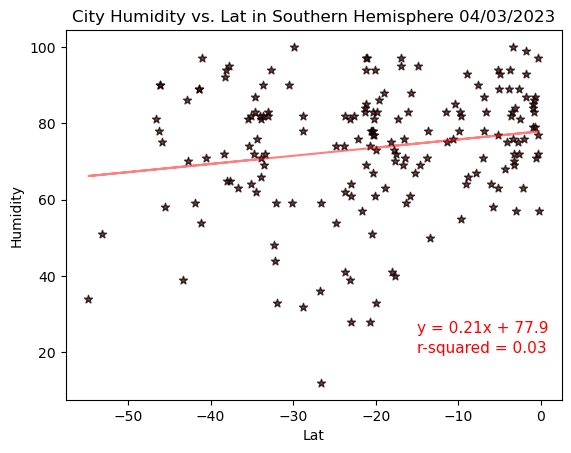

In [46]:
# Southern Hemisphere
Linregression(southern_hemi_df,"Lat", "Humidity", "Southern", "maroon", "*", (-15,25), (-15,20))

**Discussion about the linear relationship:** Neither southern nor northern hemisphere city humidity data shows a linear trend as a function of latitude.  This is clear from very low r-squared values of 0.15 and 0.03 for north and south respectively.  

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.3x + 46.06
The r-squared is: 0.02


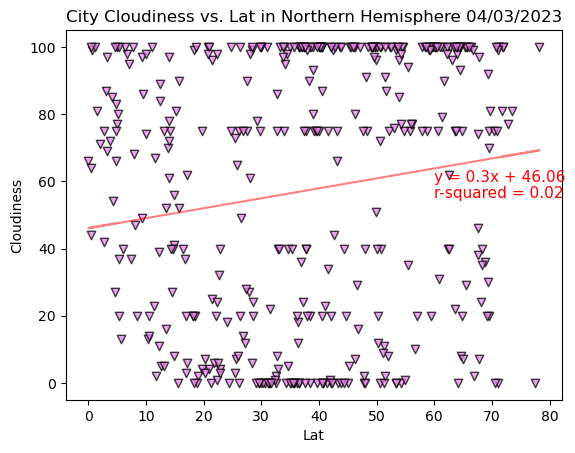

In [47]:

# Northern Hemisphere
Linregression(northern_hemi_df,"Lat", "Cloudiness", "Northern", "violet", "v", (60,60), (60,55))

y = 0.77x + 72.63
The r-squared is: 0.08


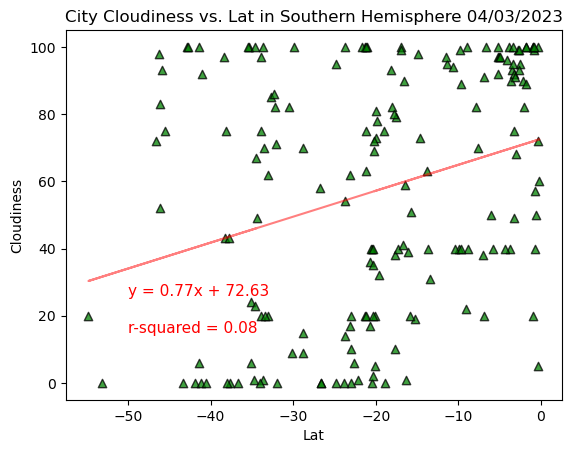

In [48]:
Linregression(southern_hemi_df,"Lat", "Cloudiness", "Southern", "green", "^", (-50,26), (-50,15))

**Discussion about the linear relationship:** Neither southern nor northern hemisphere city cloudiness data shows a linear trend as a function of latitude.  This is clear from very low r-squared values of 0.02 and 0.08 for north and south respectively.  

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x + 8.27
The r-squared is: 0.0


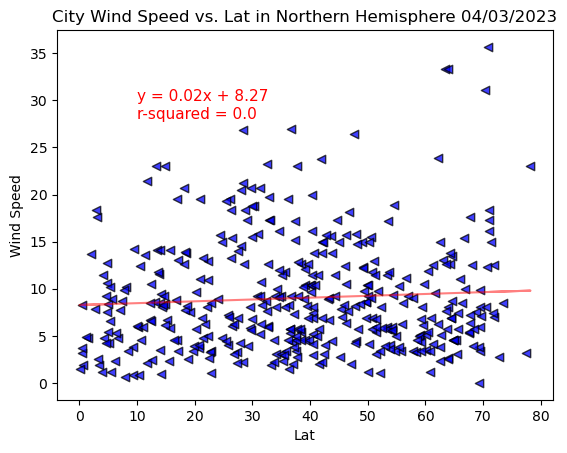

In [51]:
# Northern Hemisphere
Linregression(northern_hemi_df,"Lat", "Wind Speed", "Northern", "b", "<", (10,30), (10,28))

y = -0.08x + 5.25
The r-squared is: 0.05


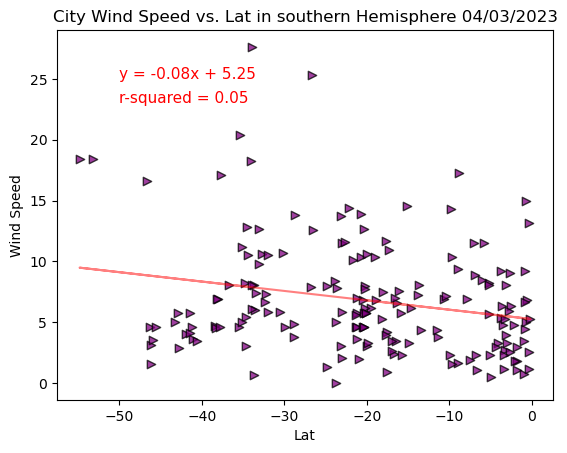

In [54]:
# Southern Hemisphere

Linregression(southern_hemi_df,"Lat", "Wind Speed", "southern", "purple", ">", (-50,25), (-50,23))


**Discussion about the linear relationship:** Neither southern nor northern hemisphere city wind speed data shows a linear trend as a function of latitude.  This is clear from very low rsquarred values of 0.0 and 0.05 for north and south respectively.  